# A2.2 LDA y Árboles de Decisión

1. Se importan los datos correspondientes a los niveles de PM2.5 del año 2022 al ambiente de trabajo.

In [3]:
import pandas as pd

# Importar los datos del csv
df = pd.read_csv('/content/drive/MyDrive/ITC/10mo Semestre/Inteligencia Artificial I/Tareas/2.2 LDA y Árboles de Decisión/MeteoContDB.csv')

# Imprimir los 10 primeros registros
print(df.head(10))

# Imprimir la info del dataframe
df.info()

        Fecha  PM2.5 (ug/m³)  tavg  prcp   wdir  wspd    pres  tavg_pres  \
0  2022-01-01           16.0  25.1   0.0  288.0   8.7  1005.4   25235.54   
1  2022-01-02            8.0  14.1   0.0  358.0  20.7  1024.2   14441.22   
2  2022-01-03            6.0   8.1   0.0   80.0   7.6  1030.5    8347.05   
3  2022-01-04           19.0  11.8   0.0  158.0   5.9  1020.9   12046.62   
4  2022-01-05           15.0  17.1   0.0  270.0   6.9  1012.7   17317.17   
5  2022-01-06           16.0  18.6   0.0  339.0   6.6  1013.2   18845.52   
6  2022-01-07           21.0  13.3   0.4   61.0  10.8  1018.8   13550.04   
7  2022-01-08           38.0  16.3   0.0  200.0   6.9  1015.5   16552.65   
8  2022-01-09           25.0  18.9   0.0  334.0   9.0  1020.3   19283.67   
9  2022-01-10            8.0  12.9   0.0    2.0  16.3  1032.8   13323.12   

   tavg_wspd  prcp_pres  
0     218.37       0.00  
1     291.87       0.00  
2      61.56       0.00  
3      69.62       0.00  
4     117.99       0.00  
5     1

- Se transforma la variable PM2.5 en una variable categórica (baja y alta contaminación) para utilizarla en los modelos de clasificación.
 - 1 - Alta
 - 0 - Baja

In [4]:
# Crear una variable categórica basada en los niveles de PM2.5
threshold = df["PM2.5 (ug/m³)"].median()   # La mediana es el umbral
df["PM2.5_class"] = (df["PM2.5 (ug/m³)"] > threshold).astype(int)

# Eliminar la columna original de PM2.5 para evitar problemas en los modelos
df = df.drop(columns=["PM2.5 (ug/m³)", "Fecha"])

# Mostrar la distribución de la nueva variable categórica
print(df["PM2.5_class"].value_counts())


PM2.5_class
0    196
1    167
Name: count, dtype: int64


- Se dividen los datos en entrenamiento y prueba (80% - 20%)

In [5]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras y objetivo
X = df.drop(columns=["PM2.5_class"])
y = df["PM2.5_class"]

# División en entrenamiento y prueba (80% - 20%), estratificada para balancear las clases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Mostrar la distribución de clases en los conjuntos resultantes
print(y_train.value_counts())
print(y_test.value_counts())

PM2.5_class
0    157
1    133
Name: count, dtype: int64
PM2.5_class
0    39
1    34
Name: count, dtype: int64


- Se dividieron los datos en una proporción 80/20, lo que quiere decir que el 80% de los datos va destinado a la parte de entrenamiento y el otro 20% a la parte de prueba. De los resultados que se obtuvieron, en la parte de entrenamiento se obtuvieron 157 de clase 0 y 133 de clase 1. En la parte de prueba se obtuvieron 39 de clase 0 y 34 de clase 1.

2. Se corre una regresión logística simple con la función GLM de statsmodels con todas las variables de entrada y se imprime el resumen del modelo en consola. Se indica cuales son las variables más relevantes para este estudio y se seleccionan, eliminando todas las demás variables de los datos de entrenamiento y prueba.

In [6]:
import statsmodels.api as sm

# Agregar constante para la regresión logística
X_train_const = sm.add_constant(X_train)

# Ajustar el modelo de regresión logística
model = sm.GLM(y_train, X_train_const, family=sm.families.Binomial()).fit()

# Mostrar el resumen del modelo
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            PM2.5_class   No. Observations:                  290
Model:                            GLM   Df Residuals:                      281
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -173.31
Date:                Fri, 21 Mar 2025   Deviance:                       346.62
Time:                        20:13:50   Pearson chi2:                     285.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1682
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.3416     69.214      1.276      0.202     -47.315     223.999
tavg           5.6059      3.026      1.853      0.064      -0.324      11.536
prcp           3.3728     16.914      0.199      0.842     -29.777      36.523
wdir          -0.0012      0.002     -0.734      0.463      -0.004       0.002
wspd          -0.2298      0.124     -1.846      0.065      -0.474       0.014
pres          -0.0825      0.067     -1.223      0.221      -0.215       0.050
tavg_pres     -0.0057      0.003     -1.925      0.054      -0.012       0.000
tavg_wspd      0.0081      0.005      1.632      0.103      -0.002       0.018
prcp_pres     -0.0034      0.017     -0.207      0.836      -0.036       0.029
==============================================================================
"""

- Se corre un proceso de selección de características para considerar solamente las dos variables mas importantes en el modelo.

In [23]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Crear un nuevo modelo de regresión logística con clases balanceadas
m2 = LogisticRegression()

# Seleccionar solo dos características mas importantes para el modelo con seleccion hacia adelante
sfs = SFS(m2, k_features=(2,2), forward=True, floating=False, scoring='f1', cv=5)
sfs.fit(X_train, y_train)
selected_features = list(sfs.k_feature_idx_)
print("Características seleccionadas:", X_train.columns[selected_features])

Características seleccionadas: Index(['prcp', 'pres'], dtype='object')


- Se seleccionan las variables descritas anteriormente, eliminando de las otras.

In [24]:
# Seleccionar solo las dos variables más relevantes
X_train_selected = X_train[X_train.columns[selected_features]]
X_test_selected = X_test[X_test.columns[selected_features]]

# Mostrar las primeras filas de los datos seleccionados
X_train_selected.head()

prcp    pres
65    0.0  1014.6
165   0.0  1013.3
276   0.0  1016.7
128   0.6  1010.4
2     0.0  1030.5

3. Se genera un modelo usando la metodología de linear discriminant analysis. Se visualiza la función discriminante con una gráfica de variable 1 vs variable 2, donde cada observación tenga algo que la distinga dependiendo de su clase. En este caso, se distingue entre la clase de baja contaminación y la clase de alta contaminación.

- Se estandarizan los datos

In [25]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento (Líneas con ayuda de ChatGPT)
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_selected, y_train)

# Verificar distribución después de SMOTE
print("Distribución después de SMOTE:")
print(y_train_bal.value_counts())

Distribución después de SMOTE:
PM2.5_class
0    157
1    157
Name: count, dtype: int64


In [28]:
from sklearn.preprocessing import StandardScaler

# Se crean nuevas columnas con los datos estandarizados en una copia del dataframe para ambas partes de entrenamiento y de prueba
scaler = StandardScaler()
X_train_scaled = X_train_bal.copy()
X_test_scaled = X_test_selected.copy()
X_train_scaled['prcp_sc'] = scaler.fit_transform(X_train_bal[['prcp']])
X_test_scaled['prcp_sc'] = scaler.transform(X_test_selected[['prcp']])
X_train_scaled['pres_sc'] = scaler.fit_transform(X_train_bal[['pres']])
X_test_scaled['pres_sc'] = scaler.transform(X_test_selected[['pres']])

# Se eliminan las columnas anteriores
X_train_scaled.drop(['prcp', 'pres'], axis=1, inplace=True)
X_test_scaled.drop(['prcp', 'pres'], axis=1, inplace=True)

# Se imprime la cabeza de uno de los conjuntos
X_train_scaled.head()

prcp_sc   pres_sc
0 -0.293248 -0.055829
1 -0.293248 -0.263297
2 -0.293248  0.279313
3 -0.122660 -0.726112
4 -0.293248  2.481673

- Se entrena el modelo y se crea la gráfica de variable 1 vs variable 2

Text(0.5, 1.0, 'LDA presión vs Precipitación')

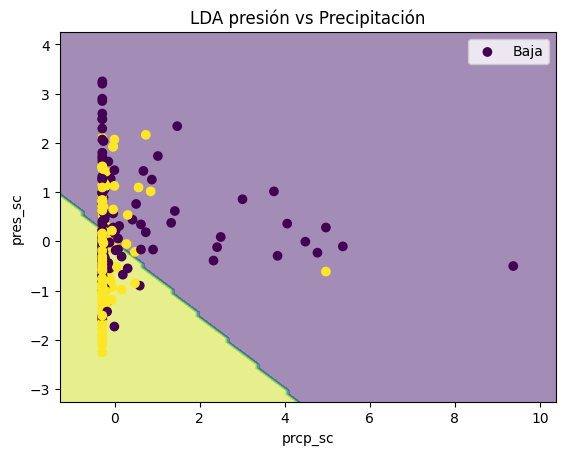

In [30]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

%matplotlib inline

# Ajustar el modelo de LDA usando los valores de prueba
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train_bal)

# Se crea la gráfica
func = DecisionBoundaryDisplay.from_estimator(lda, X_train_scaled, alpha = 0.5, response_method="predict")
plt.scatter(X_train_scaled["prcp_sc"], X_train_scaled["pres_sc"], c=y_train_bal)
plt.legend(["Baja", "Alta"])
plt.xlabel("prcp_sc")
plt.ylabel("pres_sc")
plt.title("LDA presión vs Precipitación")


- Se revisa la calidad del modelo generando la matriz de confusión y diferentes indicadores de desempeño para ver el impacto de estas variables en el modelo.

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

y_hat = lda.predict(X_test_scaled)
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat))

[[12 27]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.63      0.31      0.41        39
           1       0.50      0.79      0.61        34

    accuracy                           0.53        73
   macro avg       0.57      0.55      0.51        73
weighted avg       0.57      0.53      0.51        73



- Este modelo no es muy bueno, ya que tiene un accuracy de solo 53%, lo cual es bajo y comete muchos errores (27 errores) al clasificar en la clase de "Baja contaminación" (f1=0.41) sin embargo es más acertado cuando clasifica en "Alta contaminación" por su baja tasa de errores o falsos negativos (7 errores) y alcanzando un recall del 79% en esta categoría. Aún así, el modelo presenta un falso positivo elevado, ya que confunde con frecuencia los casos de "Baja Contaminación", clasificándolos incorrectamente como "Alta", lo que reduce su precisión en esta categoría al 63%.

4. Se genera un modelo usando la metodología de árboles de decisión. Se poda el árbol después de haber seleccionado primero un valor optimo de a mediante alguna metodología de LOOCV. Se visualiza tanto el árbol resultante, como la partición en una gráfica de variable 1 vs variable 2.

- Se genera primero el árbol original sin podar

In [40]:
from sklearn.tree import DecisionTreeClassifier as DTC, plot_tree

# Se genera el árbol de decisión completo
tree = DTC().fit(X_train_selected, y_train)

# Se gráfica el árbol de decisión
plt.figure(figsize=(120,100))
plot_tree(tree, filled=True, feature_names=X_train_selected.columns, class_names=["Baja", "Alta"])
plt.title("Árbol de decisión sin podar")
plt.show()

- Se poda el árbol usando K-Fold, se vuelve a entrenar y a graficar.

Mejor valor de alpha: 0.013715239763314346


Text(0.5, 1.0, 'Árbol de decisión podado')

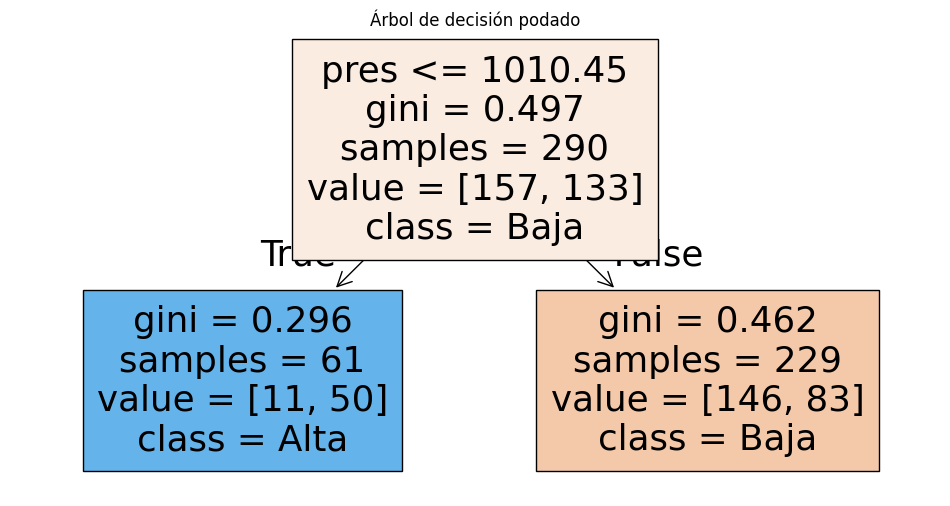

In [43]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Obtener alphas candidatos (Líneas con ayuda de ChatGPT)
path = DTC().cost_complexity_pruning_path(X_train_selected, y_train)
alphas = path.ccp_alphas[:-1]

# Selección de alpha usando K-Fold
scores = [np.mean(cross_val_score(DTC(ccp_alpha = a), X_train_selected, y_train, cv = 10)) for a in alphas]
best_alpha = alphas[np.argmax(scores)]

# Entrenar árbol
pruned_tree = DTC(ccp_alpha = best_alpha)
pruned_tree.fit(X_train_selected, y_train)
print("Mejor valor de alpha:", best_alpha)

# Visualizar
plt.figure(figsize=(12,6))
plot_tree(pruned_tree, feature_names=X_train_selected.columns, class_names=["Baja", "Alta"], filled=True)
plt.title("Árbol de decisión podado")

- Se calcula la matriz de confusión y las métricas de calidad para el modelo de árbol de decisión.

In [44]:
yhatTree = pruned_tree.predict(X_test_selected)
print(confusion_matrix(y_test, yhatTree))
print(classification_report(y_test, yhatTree))

[[34  5]
 [21 13]]
              precision    recall  f1-score   support

           0       0.62      0.87      0.72        39
           1       0.72      0.38      0.50        34

    accuracy                           0.64        73
   macro avg       0.67      0.63      0.61        73
weighted avg       0.67      0.64      0.62        73



- El modelo de árbol de decisión logró una presición global del 64%, lo que parece ser una buena señal ya que significa que clasifica correctamente más de la mitad en el conjunto de datos de prueba. En cuanto a los resultados en la matriz de confusión, es muy acertado al clasificar en la clase de "Baja contaminación" con un recall del 87%, lo que significa que la mayoría de los casos reales de contaminación baja fueron correctamente identificados. Sin embargo, este presenta dificultades al clasificar en "Alta contaminación" ya que mas de la mitad de los casos reales de clase alta son mal clasificados en la clase opuesta.  

En este caso, considero que el modelo de árbol de decisión tuvo mejores métricas de rendimiento y calidad general, resultó ser un poco más preciso globalmente que el del LDA y particularmente es mejor clasificando en ambas clases por separado a pesar de que ambos modelos tienen mas dificultades para clasificar en ciertas clases, ya que los indicadores del árbol de decisión al ser mas elevados, suele indicar un mejor desempeño por parte del modelo.